In [1]:
# Plot zones where these things are true vs. radius (just stripes on an x-axis or something):
# instead of using a fixed number for the inequality, use the m2 quantity
# (i) t_conv < t_inspiral & L_conv < L_drag
# (ii) t_conv < t_inspiral & L_conv > L_drag
# (iii) t_conv > t_inspiral

In [2]:
# import as needed
import mesa_reader as mr
import matplotlib.pylab as plt
import numpy as np
import os
from math import log
from scipy.integrate import cumtrapz
import math

from ipynb.fs.full.functions import getMaxRadiusProfile
from ipynb.fs.full.functions import getTConv
from ipynb.fs.full.functions import getMaxLum
from ipynb.fs.full.functions import getTInspiral
from ipynb.fs.full.functions import getDragLum
from ipynb.fs.full.functions import getR2

G = 6.67408e-11 # gravitational constant
# change G to cgs units
G = G * 1e3

In [3]:
directory = '/Users/emilyflynn/Desktop/25M_tests/15M_logs/'
p15 = getMaxRadiusProfile(directory)

directory = '/Users/emilyflynn/Desktop/25M_tests/20M_logs/'
p20 = getMaxRadiusProfile(directory)

directory = '/Users/emilyflynn/Desktop/25M_tests/25M_logs/'
p25 = getMaxRadiusProfile(directory)

directory = '/Users/emilyflynn/Desktop/25M_tests/30M_logs/'
p30 = getMaxRadiusProfile(directory)

directory = '/Users/emilyflynn/Desktop/25M_tests/40M_logs/'
p40 = getMaxRadiusProfile(directory)

directory = '/Users/emilyflynn/Desktop/25M_tests/50M_logs/'
p50 = getMaxRadiusProfile(directory)

directory = '/Users/emilyflynn/Desktop/25M_tests/55M_logs/'
p55 = getMaxRadiusProfile(directory)

directory = '/Users/emilyflynn/Desktop/25M_tests/58M_logs/'
p58 = getMaxRadiusProfile(directory)

directory = '/Users/emilyflynn/Desktop/25M_tests/60M_logs/'
p60 = getMaxRadiusProfile(directory)

directory = '/Users/emilyflynn/Desktop/25M_tests/70M_logs/'
p70 = getMaxRadiusProfile(directory)

Looking for the profile closest to model #2050 in /Users/emilyflynn/Desktop/25M_tests/15M_logs/
Looking for the profile closest to model #2377 in /Users/emilyflynn/Desktop/25M_tests/20M_logs/
Looking for the profile closest to model #394 in /Users/emilyflynn/Desktop/25M_tests/25M_logs/
Looking for the profile closest to model #294 in /Users/emilyflynn/Desktop/25M_tests/30M_logs/
Looking for the profile closest to model #289 in /Users/emilyflynn/Desktop/25M_tests/40M_logs/
Looking for the profile closest to model #189 in /Users/emilyflynn/Desktop/25M_tests/50M_logs/
Looking for the profile closest to model #228 in /Users/emilyflynn/Desktop/25M_tests/55M_logs/
Looking for the profile closest to model #266 in /Users/emilyflynn/Desktop/25M_tests/58M_logs/
Looking for the profile closest to model #11952 in /Users/emilyflynn/Desktop/25M_tests/60M_logs/
Looking for the profile closest to model #905 in /Users/emilyflynn/Desktop/25M_tests/70M_logs/


In [4]:
# go ahead and import radius for everything
def getRadius(p, localSim):
    
    if localSim:
            r = p.logR       # bring in the radius
            r = 10**r        # un-log it

    else:
        r = p.radius     # bring in the radius

    r = r*69.551e9   # change units to cm
    r = r[100:]      # cut off the first 100 points - takes care of surface weirdness
    
    return r

In [5]:
# determine which situation it is
def findZone(tconv, lconv, tinsp, ldrag):
    if ((tconv < tinsp) and (lconv < ldrag)):
        return 'removeAll'
    
    elif ((tconv < tinsp) and (lconv > ldrag)):
        return 'removeLimited'
    
    elif (tconv > tinsp):
        return 'removeNone'

# just get the maximum radius
def getMaxRadius(rList):
    return rList[0]

# normalize the radius by dividing by the max radius
def normalizeRadius(r, maxR):
    normR = r / maxR
    return normR

In [6]:
# keep m2 constant and compare multiple m1 values
def plotConvZonesConstSec(p, localSim, m1, m2, ypos):
    """Plots convective zones for multiple primary masses given constant secondary mass.
    
    Keyword arguments:
    p -- MESA profile
    localSim -- boolean; if the profile was generated locally
    m1 -- mass of the primary
    m2 -- mass of the secondary
    ypos -- where on the y-axis the data is plotted
    """
    r = getRadius(p, localSim)
    tconv = getTConv(p)
    maxLum = getMaxLum(p, localSim)
    tinsp = getTInspiral(p, m2)
    dragLum = getDragLum(p, m2)
    
    # tconv is always awkwardly short
    r = r[:-2]

    maxR = getMaxRadius(r)
    n = normalizeRadius(r, maxR)
    
    coreMass = p.he_core_mass + p.c_core_mass + p.o_core_mass + p.si_core_mass + p.fe_core_mass
    coreMass = coreMass*1.989e33
    
    # cut at rshred
    r2 = getR2(m2)
    m2 = m2*1.989e33 # units
    r2 = r2*69.551e9 # units
    rshred = r2 * (2*coreMass/m2)**(1/3)
    
    i = 0
    for x in r:
        if x > rshred:
            i+=1
    
    maxLum = np.flip(maxLum)
    tinsp = np.flip(tinsp)
    
    r = r[:i]
    n = n[:i]
    tconv = tconv[:i]
    maxLum = maxLum[:i]
    tinsp = tinsp[:i]
    dragLum = dragLum[:i]

    for i in range(len(r)):
        s = findZone(tconv[i], maxLum[i], tinsp[i], dragLum[i])

        color = ''
        name = ''

        if (s == 'removeAll'):
            color = 'g+'

        elif (s == 'removeLimited'):
            color = 'b+'

        elif (s == 'removeNone'):
            color = 'r+'
            
        plt.plot(n[i], ypos, color)

In [7]:
# keep m1 constant and compare multiple m2 values

def plotConvZonesConstPri(p, localSim, m1, m2, ypos):
    """Plots convective zones for multiple secondary masses given constant primary mass.
    
    Keyword arguments:
    p -- the m1 MESA profile being used
    localSim -- boolean; local or web simulation
    m1 -- mass of the primary star (should be removed soon)
    m2 -- mass of the secondary star
    ypos -- where on the y-axis the data is plotted
    """
    r = getRadius(p, localSim)
    tconv = getTConv(p)
    maxLum = getMaxLum(p, localSim)
    tinsp = getTInspiral(p, m2)
    dragLum = getDragLum(p, m2)
    
    # tconv is always awkwardly short
    r = r[:-2]

    maxR = getMaxRadius(r)
    n = normalizeRadius(r, maxR)
    
    coreMass = p.he_core_mass + p.c_core_mass + p.o_core_mass + p.si_core_mass + p.fe_core_mass
    coreMass = coreMass*1.989e33
    
    # cut at rshred
    r2 = getR2(m2)
    m2 = m2*1.989e33 # units
    r2 = r2*69.551e9 # units
    rshred = r2 * (2*coreMass/m2)**(1/3)
    
    i = 0
    for x in r:
        if x > rshred:
            i+=1
    
    maxLum = np.flip(maxLum)
    tinsp = np.flip(tinsp)
    
    r = r[:i]
    n = n[:i]
    tconv = tconv[:i]
    maxLum = maxLum[:i]
    tinsp = tinsp[:i]
    dragLum = dragLum[:i]

    for i in range(len(r)):
        s = findZone(tconv[i], maxLum[i], tinsp[i], dragLum[i])

        color = ''
        name = ''

        if (s == 'removeAll'):
            color = 'g*'

        elif (s == 'removeLimited'):
            color = 'b*'

        elif (s == 'removeNone'):
            color = 'r+'
            
        plt.plot(n[i], ypos, color)

/Users/emilyflynn/anaconda3/lib/python3.7/site-packages/mesa_reader/__init__.py:335: RuntimeWarning: divide by zero encountered in log10
  return np.log10(self.bulk_data[self._exp10_version(key)])


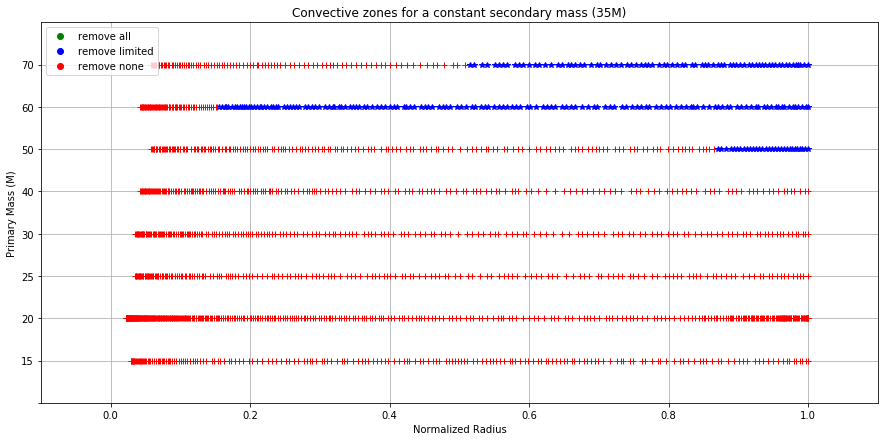

In [8]:
### EDIT ###
m2 = 35
m1vals = [15, 20, 25, 30, 40, 50, 60, 70]
profiles = [p15, p20, p25, p30, p40, p50, p60, p70]
### END EDIT ###

fig, ax = plt.subplots(figsize=(15,7))
plt.xlabel('Normalized Radius')
plt.ylabel('Primary Mass (M)')
plt.grid(True)
        
# bit of a hacky way to make a legend
x = -10
p1, = plt.plot(x, x, 'go')
p2, = plt.plot(x, x, 'bo')
p3, = plt.plot(x, x, 'ro')

for i in range(len(m1vals)):
    # leave False as default - handles both cases
    plotConvZonesConstPri(profiles[i], False, m1vals[i], m2, i+1)
    i+=1

plt.legend((p1, p2, p3), ('remove all', 'remove limited', 'remove none'))
plt.xlim(-0.1, 1.1)
plt.ylim(0, i+1)
title = 'Convective zones for a constant secondary mass (' + str(m2) + 'M)'
plt.title(title)
ax.set_yticks(range(len(m1vals) + 1))

labels = ['']
for val in m1vals:
    labels.append(str(val))

ax.set_yticklabels(labels)

plt.show()

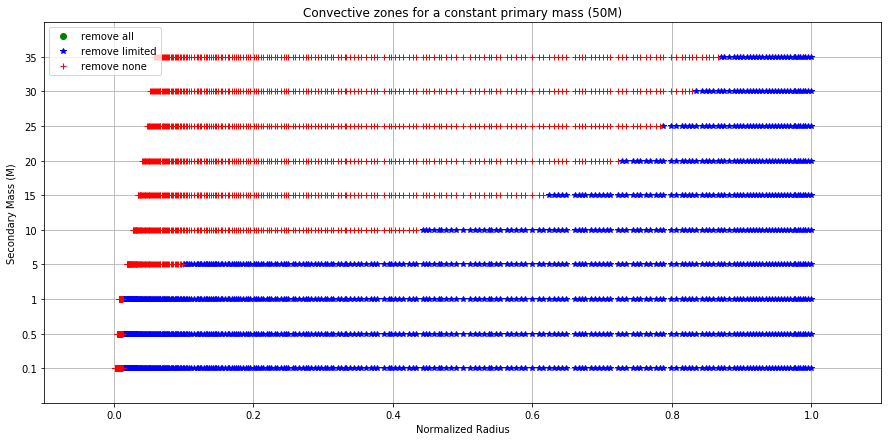

In [9]:
### EDIT ###
m1 = 50
profile = p50
m2vals = [0.1, 0.5, 1, 5, 10, 15, 20, 25, 30, 35]
### END EDIT ###

fig, ax = plt.subplots(figsize=(15,7))
plt.xlabel('Normalized Radius')
plt.ylabel('Secondary Mass (M)')
plt.grid(True)
        
x = -10
p1, = plt.plot(x, x, 'go')
p2, = plt.plot(x, x, 'b*')
p3, = plt.plot(x, x, 'r+')

i = 1

for val in m2vals:
    # leave False as default
    plotConvZonesConstPri(profile, False, m1, val, i)
    i+=1

plt.legend((p1, p2, p3), ('remove all', 'remove limited', 'remove none'))
plt.xlim(-0.1, 1.1)
plt.ylim(0, i)
title = 'Convective zones for a constant primary mass (' + str(m1) + 'M)'
plt.title(title)
ax.set_yticks(range(len(m2vals) + 1))

labels = ['']
for val in m2vals:
    labels.append(str(val))

ax.set_yticklabels(labels)

plt.show()